## Set Up

In this section, we import necessary python packages to run our code.

Additionally, we use Kaggle Hub to import our arabic sign language dataset.

To succesfully import the data you will need to:


*   Navigate to kaggle.com
*   Click on your profile picture in the right hand side. You will need an account for this.
* Select Settings from the drop down menu, and scroll down until you see "API".
* Create a New Token (figure below). A JSON file will be created.
* When COLAB prompts you to add your kaggle creditials, add the credientals given in the json created above.  

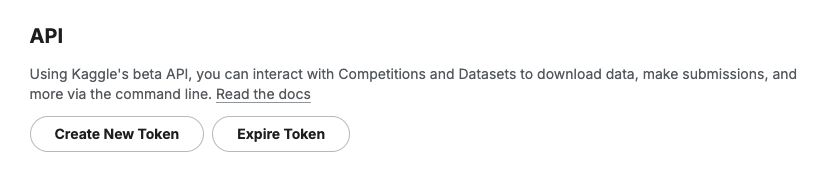



# New Section

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


## Import and Inspect the Data

Import the data set.

In [ ]:
dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
print(dataset_path)

/kaggle/input/-spotify-tracks-dataset


Check how the data was imported. It is 1 CSV.

In [ ]:
def count_files(datapath):
    file_count = 0
    for root, dirs, files in os.walk(datapath):
        file_count += len(files)
    return file_count

datapath = dataset_path # Replace with the actual path
num_files = count_files(datapath)
print(f"The number of files in {datapath} is: {num_files}")

The number of files in /kaggle/input/-spotify-tracks-dataset is: 1


Get the mean, count, and percentiles for each feature.

In [ ]:
df = pd.read_csv(dataset_path + "/dataset.csv")

# get initial information
#print(df.head())
print(df.describe())

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

In [ ]:
print("Row count: ", df.shape[0])
print("Col count: ", df.shape[1])
print("Col names ", df.columns.tolist())
column_types = df.dtypes
print("Column Types" , column_types)

Row count:  114000
Col count:  21
Col names  ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
Column Types Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [ ]:
unique_values = df['track_genre'].unique()
value_counts = df['track_genre'].value_counts()
print("Unique Tracks per genre ", value_counts)

Unique Tracks per genre  track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64


## Handle Missing Data

Looking at all of the columns in the code, there is not a concering amount of missing data in each column, with 0-1 missing values per column.

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


##Explore Data Characteristics

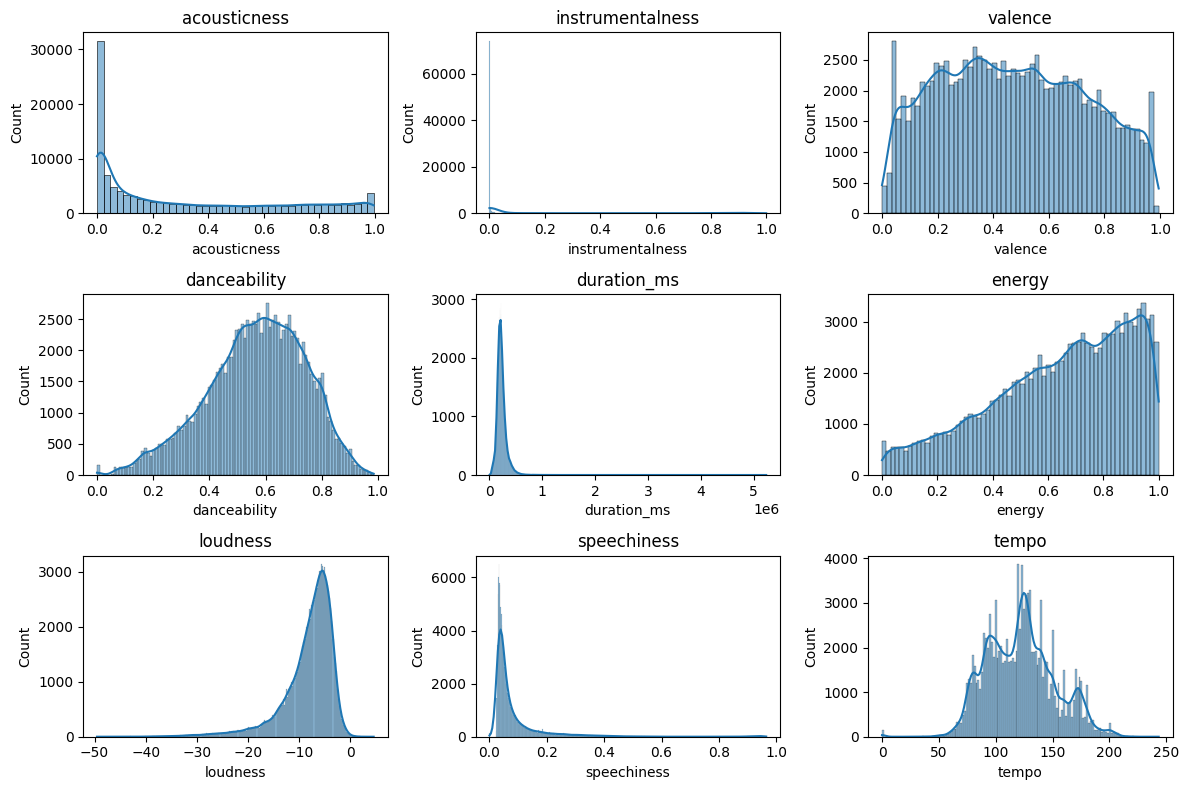


mean:
acousticness             0.314910
instrumentalness         0.156050
valence                  0.474068
danceability             0.566800
duration_ms         228029.153114
energy                   0.641383
loudness                -8.258960
speechiness              0.084652
tempo                  122.147837
dtype: float64 , 
median:
acousticness             0.169000
instrumentalness         0.000042
valence                  0.464000
danceability             0.580000
duration_ms         212906.000000
energy                   0.685000
loudness                -7.004000
speechiness              0.048900
tempo                  122.017000
dtype: float64 , 
std:
 acousticness             0.332523
instrumentalness         0.309555
valence                  0.259261
danceability             0.173542
duration_ms         107297.712645
energy                   0.251529
loudness                 5.029337
speechiness              0.105732
tempo                   29.978197
dtype: float64


In [ ]:
# Plot histograms for some of the features
features_to_plot = ['acousticness', 'instrumentalness', 'valence', 'danceability', 'duration_ms', 'energy', 'loudness', 'speechiness', 'tempo']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

The data is skewed to the right for speechiness, as the median is less than the mean. The data is skewed left for energy and popularity, as the mean is less than median. The data is normally distrubted for tempo.

## Perform Data Transformation

Transforming the data using min-max to ensure that the data scales values to between 0 and 1.

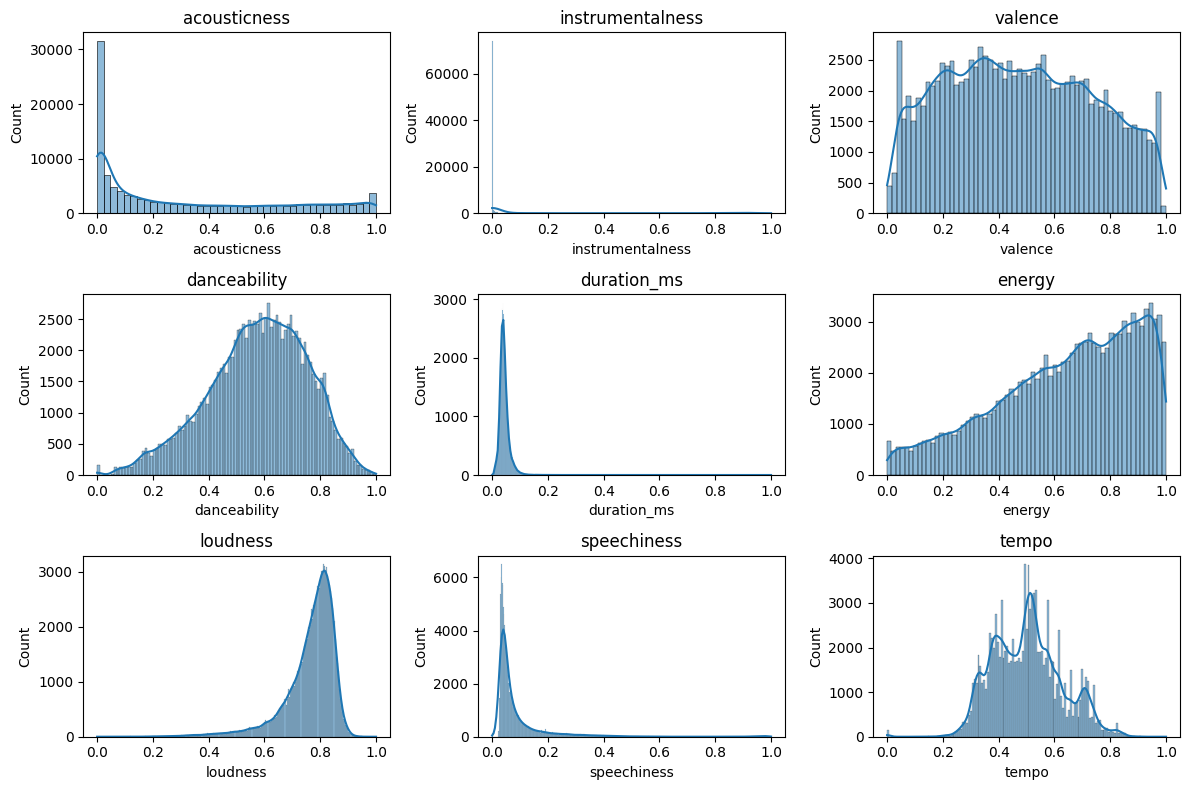


mean:
acousticness        0.316175
instrumentalness    0.156050
valence             0.476450
danceability        0.575432
duration_ms         0.043539
energy              0.641383
loudness            0.763406
speechiness         0.087722
tempo               0.501898
dtype: float64 , 
median:
acousticness        0.169679
instrumentalness    0.000042
valence             0.466332
danceability        0.588832
duration_ms         0.040652
energy              0.685000
loudness            0.786619
speechiness         0.050674
tempo               0.501360
dtype: float64 , 
std:
 acousticness        0.333858
instrumentalness    0.309555
valence             0.260564
danceability        0.176185
duration_ms         0.020487
energy              0.251529
loudness            0.093027
speechiness         0.109567
tempo               0.123178
dtype: float64


In [ ]:
# Plot standarized values for features from feature selection
mmscaler = MinMaxScaler()
features_to_scale = ['acousticness', 'instrumentalness', 'valence', 'danceability', 'duration_ms', 'energy', 'loudness', 'speechiness', 'tempo']
mm_data = mmscaler.fit_transform(df[features_to_scale])
df_mm_data = pd.DataFrame(mm_data, columns=features_to_scale)


plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_scale, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_mm_data[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df_mm_data[features_to_scale].mean() , df_mm_data[features_to_scale].median(), df_mm_data[features_to_scale].std()))

#Correlation Matrix

In [ ]:
numbers_df = df.iloc[:,5:20]
numbers_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


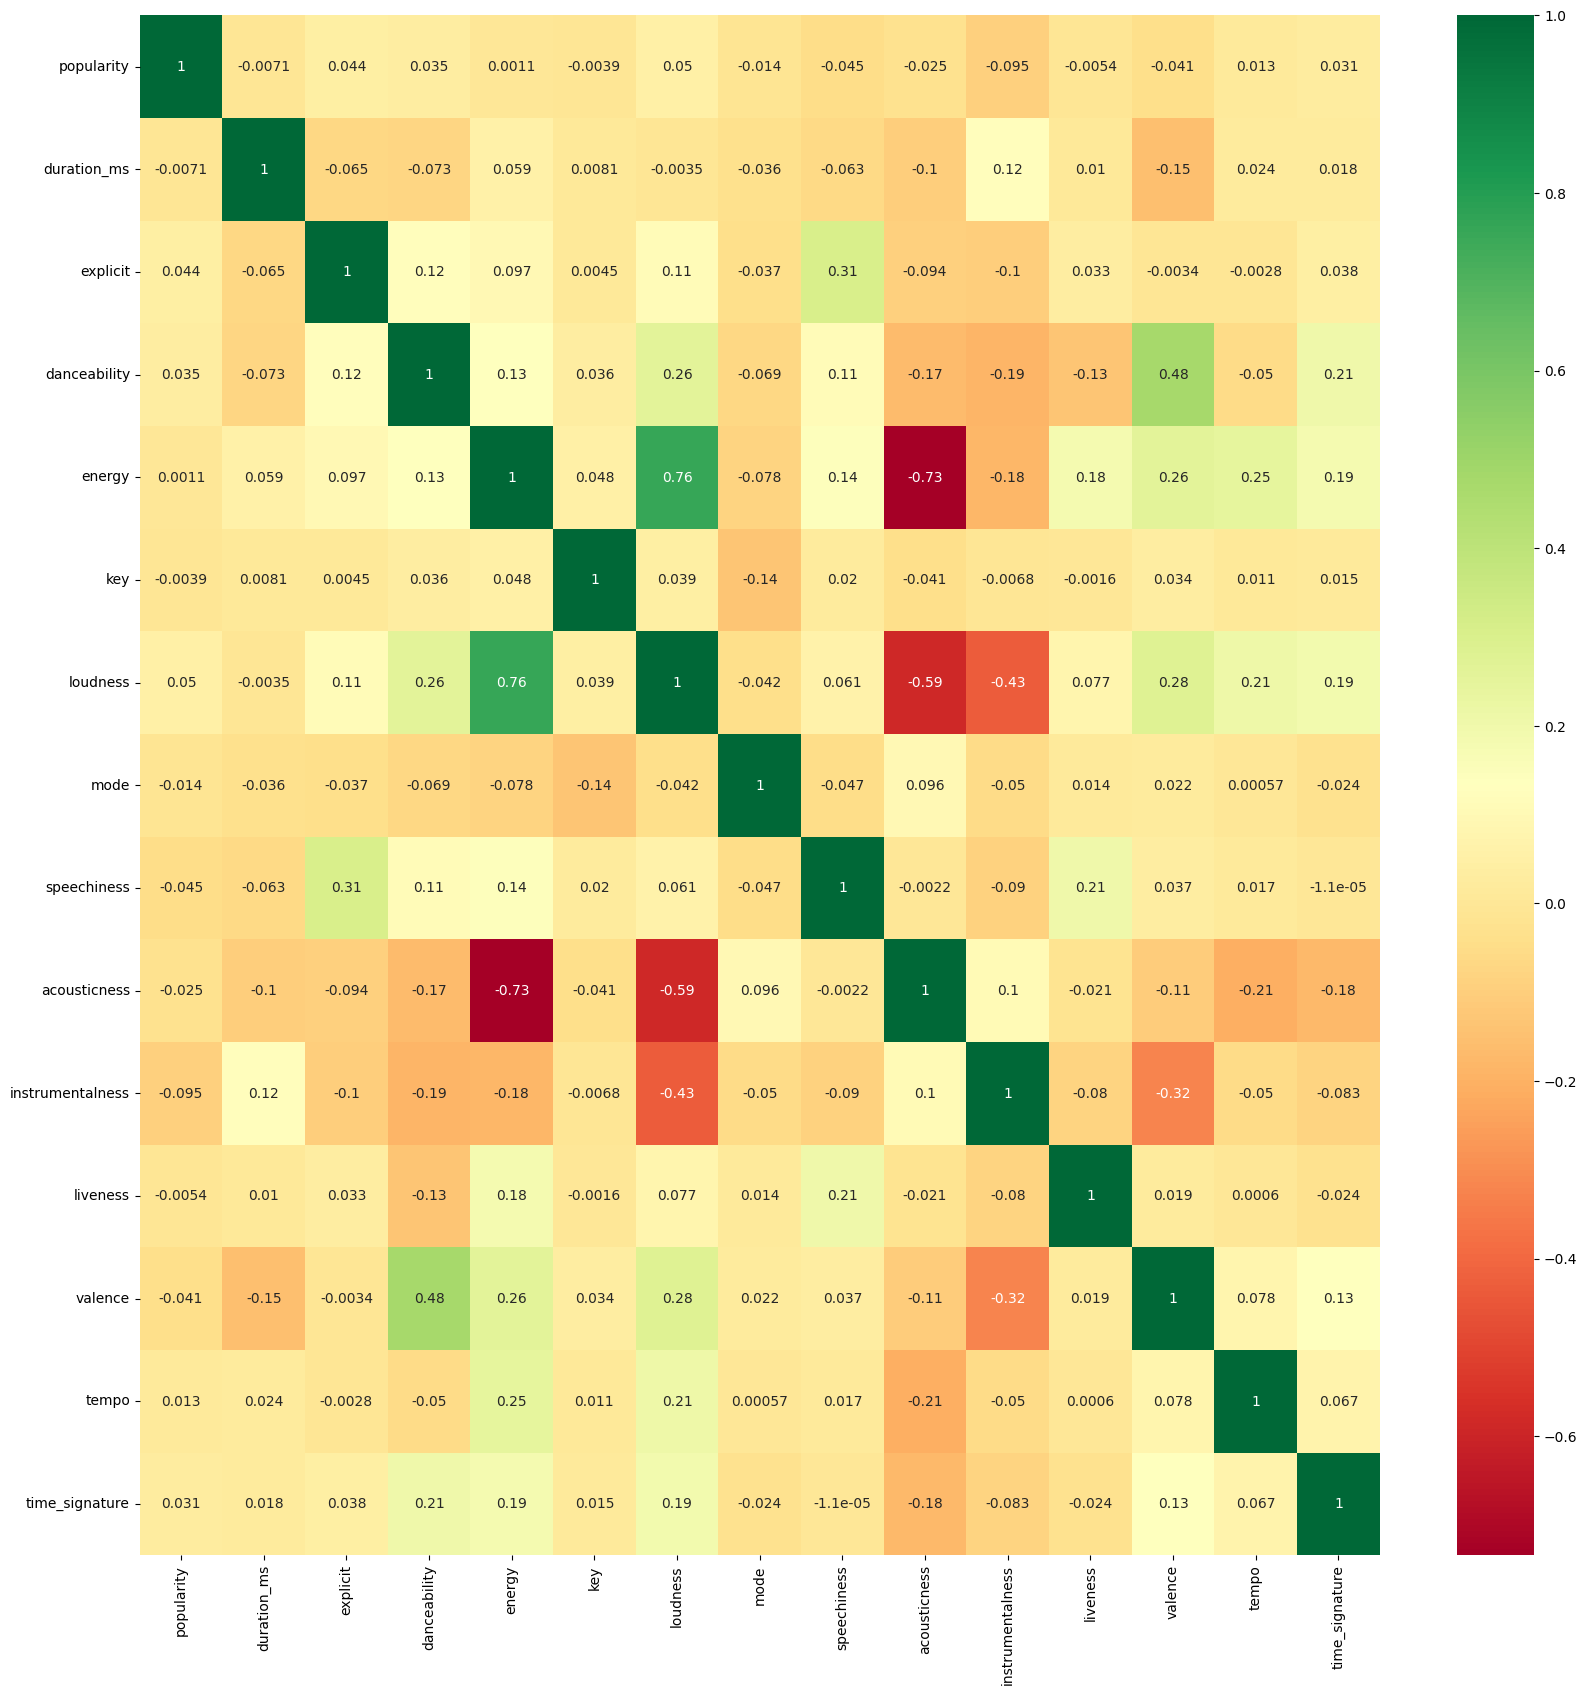

In [ ]:
corrmat = numbers_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(numbers_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#Change Categorical Data and Scale all features

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]

genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

print("Shape of final dataframe with encoded genres:", df_with_encoded_genres.shape)
print("\nColumns in the final dataframe:")
print(df_with_encoded_genres.columns.tolist())

print("\nFirst few rows of the cleaned dataframe (including track_genre):")
print(df_with_encoded_genres.head())

Shape of final dataframe with encoded genres: (114000, 130)

Columns in the final dataframe:
['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-p

In [ ]:
mmscaler = MinMaxScaler()
mm_datax = mmscaler.fit_transform(df_with_encoded_genres)
df_mm_data = pd.DataFrame(mm_datax, columns=df_with_encoded_genres.columns)
print(df_mm_data.columns.tolist())
df_mm_data.head()

['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'met

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,0.000000,0.73,0.044043,0.0,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000009,0.55,0.028566,0.0,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000018,0.57,0.040255,0.0,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000026,0.71,0.038557,0.0,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000035,0.82,0.037969,0.0,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Use Above for your model, it is scaled and one hot encoded

#Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

numerical_columns = ['duration_ms', 'danceability', 'energy', 'key',
                    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo', 'time_signature']

genre_columns = df_with_encoded_genres.columns.difference(numerical_columns)
feature_columns = [col for col in numerical_columns if col != 'popularity']
feature_columns.extend(genre_columns)


X = df_mm_data[feature_columns]
y = df_mm_data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=24)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Feature importance analysis

importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': xgb_model.feature_importances_
})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nTop 10 Features by Importance:")
print(importance_df.head(10))


Top 10 Features by Importance:
            feature  importance
108         romance    0.043818
74          iranian    0.043722
96         pop-film    0.037503
82            latin    0.035470
80            k-pop    0.027845
27    chicago-house    0.026151
30        classical    0.025994
38   detroit-techno    0.025835
29            chill    0.024929
79             jazz    0.022341


This says track genre is the most important.

## Remove genres, predict based on numerical columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

numerical_columns = ['duration_ms', 'danceability', 'energy',
                    'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo']

X = df_mm_data[numerical_columns]
y = df_mm_data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=24)

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {r2:.4f}")


# Feature importance analysis

importance_df = pd.DataFrame({
    'feature': numerical_columns,
    'importance': xgb_model.feature_importances_
})
importance_df = importance_df.sort_values('importance', ascending=False)

print("\nTop 10 Features by Importance:")
print(importance_df.head(10))


Model Performance Metrics:
Root Mean Squared Error: 0.2022
Mean Absolute Error: 0.1641
R-squared Score: 0.1828

Top 10 Features by Importance:
            feature  importance
5      acousticness    0.131658
6  instrumentalness    0.115313
8           valence    0.108003
1      danceability    0.105101
0       duration_ms    0.099860
2            energy    0.095909
3          loudness    0.089376
4       speechiness    0.089014
9             tempo    0.086863
7          liveness    0.078902


# Linear Regression Model

Mean Squared Error (MSE): 369.59
R-squared (R2): 0.255
Mean Absolute Error (MAE): 14.13
Relative Accuracy: 57.16%


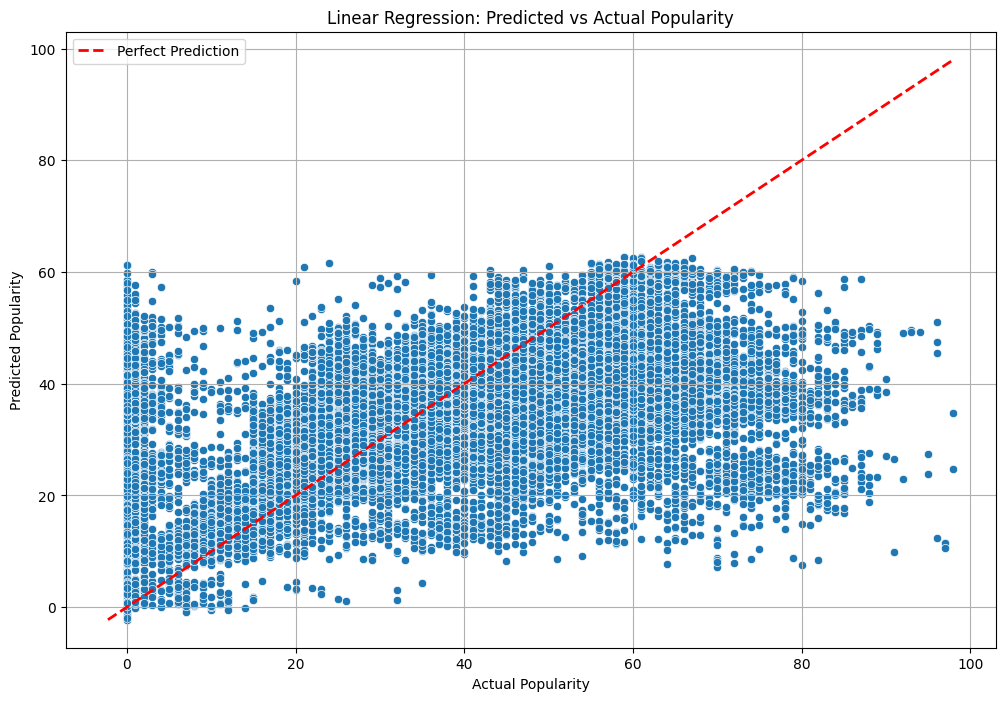

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.preprocessing import StandardScaler, OneHotEncoder

dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

df = pd.read_csv(dataset_path + "/dataset.csv")
df = df.dropna()

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]
genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

df_with_encoded_genres = df_with_encoded_genres.dropna()

numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
features = numerical_features + list(genre_names)
target = 'popularity'

X = df_with_encoded_genres[features]
y = df_with_encoded_genres[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mean_actual = np.mean(y_test)
relative_accuracy = 1 - (mae / mean_actual)

print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R2):", round(r2, 3))
print("Mean Absolute Error (MAE):", round(mae, 2))
print(f"Relative Accuracy: {relative_accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Linear Regression: Predicted vs Actual Popularity")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.grid(True)
plt.legend()
plt.show()

# Lasso Regression Model

Mean Squared Error (MSE): 369.59
R-squared (R2): 0.255
Mean Absolute Error (MAE): 14.15
Relative Accuracy: 57.10%


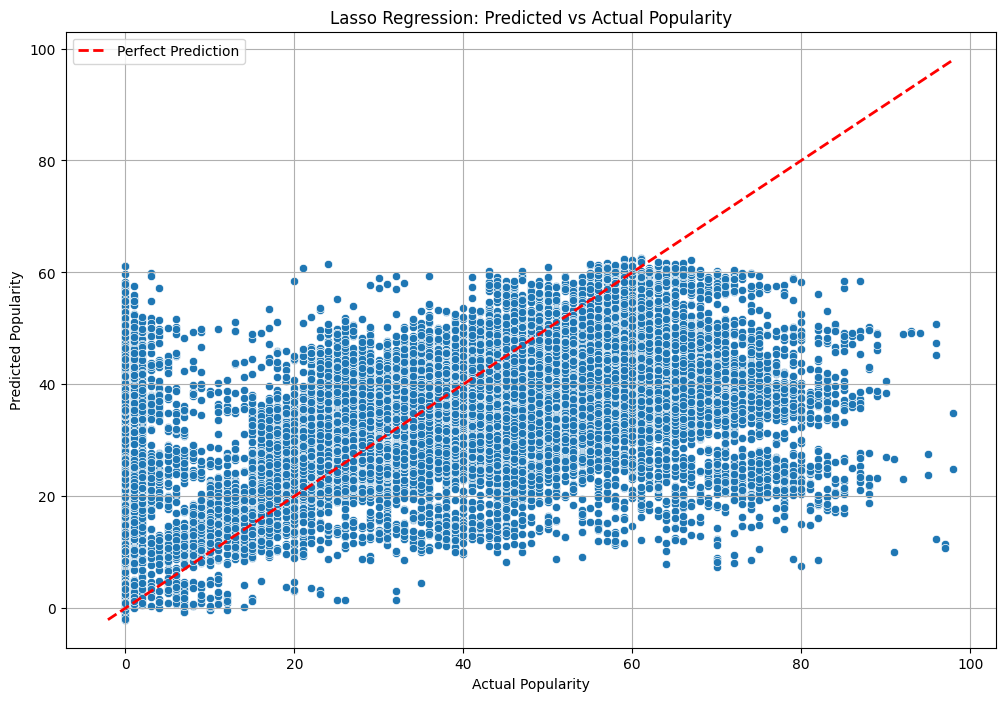

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

df = pd.read_csv(dataset_path + "/dataset.csv")
df = df.dropna()

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]
genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

df_with_encoded_genres = df_with_encoded_genres.dropna()

numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
features = numerical_features + list(genre_names)
target = 'popularity'

X = df_with_encoded_genres[features]
y = df_with_encoded_genres[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mean_actual = np.mean(y_test)
relative_accuracy = 1 - (mae / mean_actual)

print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R2):", round(r2, 3))
print("Mean Absolute Error (MAE):", round(mae, 2))
print(f"Relative Accuracy: {relative_accuracy * 100:.2f}%")

plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title("Lasso Regression: Predicted vs Actual Popularity")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
plt.grid(True)
plt.legend()
plt.show()

# Random Forest Regressor

Random Forest Regressor
Mean Squared Error (MSE): 357.69
R² Score: 0.284
Mean Absolute Error (MAE): 14.72
Relative Accuracy: 22.21%


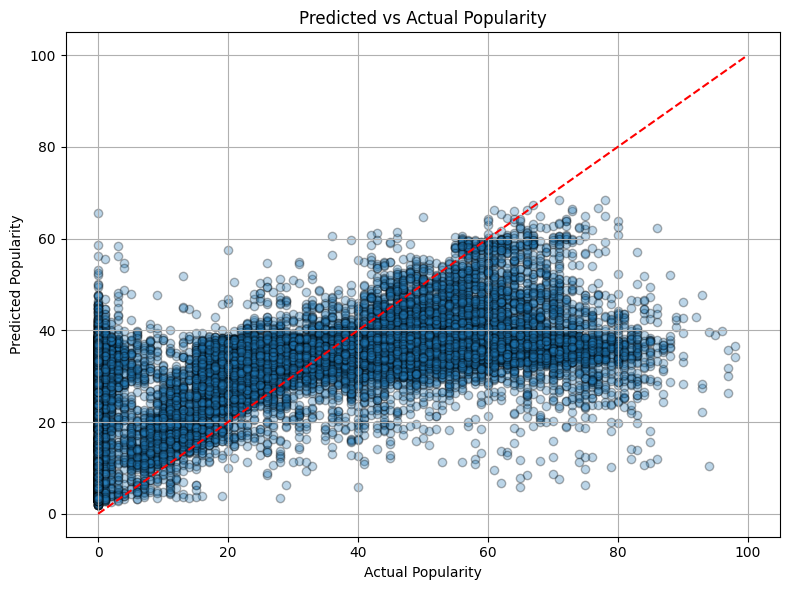

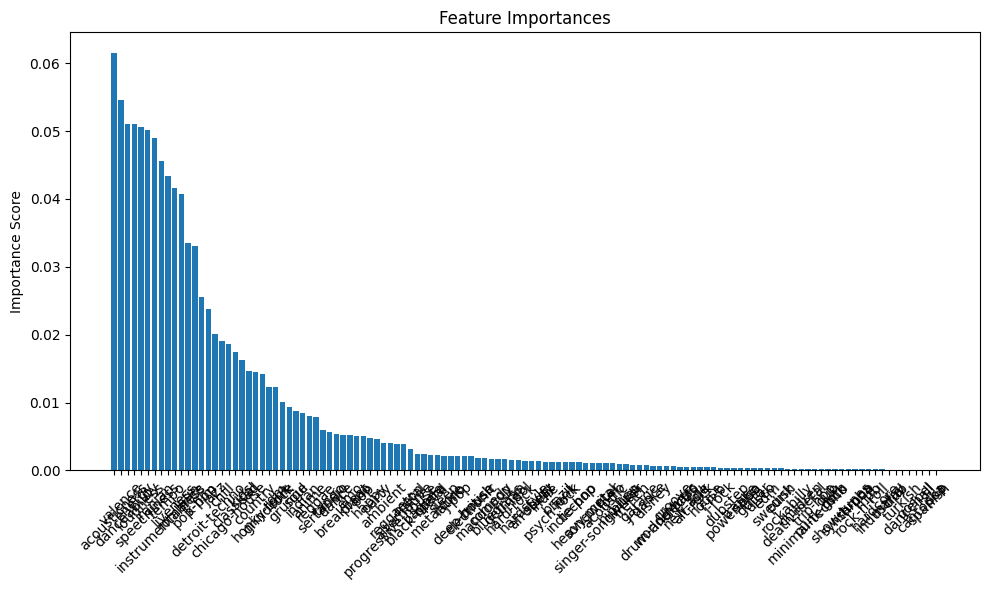

FileNotFoundError: [Errno 2] No such file or directory: 'models/random_forest.pkl'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import kagglehub
import joblib

dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
df = pd.read_csv(dataset_path + "/dataset.csv")

df = df.dropna()

onehot = OneHotEncoder(sparse_output=False)
genre_encoded = onehot.fit_transform(df[['track_genre']])
genre_names = onehot.categories_[0]
genre_encoded_df = pd.DataFrame(genre_encoded, columns=genre_names)

columns_to_drop = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
df_with_encoded_genres = pd.concat([df, genre_encoded_df], axis=1)
df_with_encoded_genres = df_with_encoded_genres.drop(columns=columns_to_drop)

numerical_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]
features = numerical_features + list(genre_names)
target = 'popularity'

df_clean = df_with_encoded_genres.dropna(subset=features + [target])
df_sample = df_clean.sample(n=100000, random_state=42)

X = df_sample[features]
y = df_sample[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

forest = RandomForestRegressor(n_estimators=500, max_depth=30, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', bootstrap=True, random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = 100 * (1 - (np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))))

print("Random Forest Regressor")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Relative Accuracy: {accuracy:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolors='k')
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Predicted vs Actual Popularity")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.tight_layout()
plt.show()

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_features = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), sorted_features, rotation=45)
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

joblib.dump(forest, 'models/random_forest.pkl')
joblib.dump(features, 'models/feature_columns_rf.pkl')



# K-Means Clustering

/kaggle/input/-spotify-tracks-dataset
              tempo   valence    energy  danceability   loudness
cluster                                                         
0        107.823611  0.309409  0.659700      0.553413  -7.351689
1        117.521791  0.725051  0.704450      0.703531  -6.908136
2        107.334494  0.255691  0.223635      0.415921 -17.125701
3        159.446313  0.436643  0.798146      0.463821  -5.660856


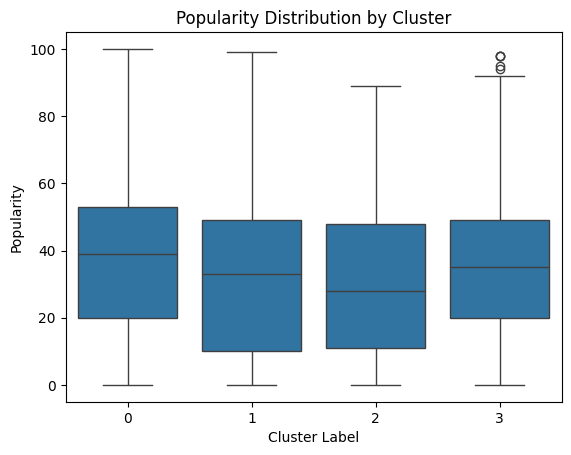

KMeans Inertia: 290777.12908992695


In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler

dataset_path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")
print(dataset_path)

df = pd.read_csv(dataset_path + "/dataset.csv")

features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo'
]
target = 'popularity'

df_clean = df.dropna(subset=features + [target])
df_sample = df_clean.sample(n=100000, random_state=42)

X = df_sample[features]
y = df_sample[target]

features = ['tempo', 'valence', 'energy', 'danceability', 'loudness']
df_clean = df[features].dropna()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)


optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)

sns.boxplot(x='cluster', y='popularity', data=df)
plt.title("Popularity Distribution by Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Popularity")
plt.show()

print("KMeans Inertia:", kmeans.inertia_)


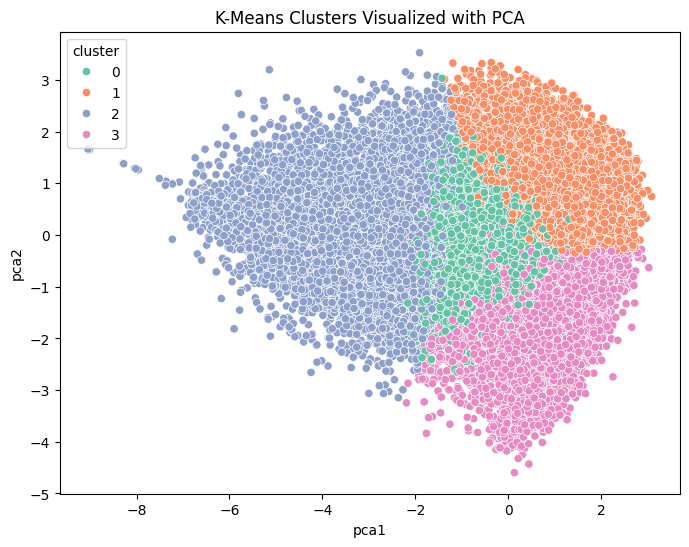

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title("K-Means Clusters Visualized with PCA")
plt.show()

In [ ]:
def recommend_similar(song_index, df, indices):
    print(" Target Song Features:")
    print(df.iloc[song_index][features])
    print("\n Recommended Songs (feature similarity):")
    return df.iloc[indices[song_index][1:]][features]


In [ ]:

df['popularity_label'] = pd.cut(df['popularity'], bins=[0, 40, 70, 100], labels=['Low', 'Medium', 'High'])

pd.crosstab(df['cluster'], df['popularity_label'], normalize='index')  # row-wise percentages


popularity_label,Low,Medium,High
cluster,,,
0,0.466513,0.477477,0.056010
1,0.536670,0.400449,0.062881
2,0.572533,0.408723,0.018744
3,0.550328,0.410043,0.039630
